In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
from seaborn.apionly import color_palette
%matplotlib inline

In [2]:
from dynesty import utils as dyfunc

In [3]:
from scipy.stats import norm

In [4]:
plt.style.use('cook')

In [5]:
from setup_files.mocks_paper1.mock_models import models, run_names, results as res

In [6]:
max_logls = pd.read_csv('setup_files/mocks_paper1/max_logls.csv', index_col=0)
max_logls.head(10)

,logl_mean,logl_true
run_name,,
mock_1,-983.309,-983.309
mock_2,-66.765,-66.765
mock_3,-921.957,-921.957
mock_4,-47.331,-47.331
mock_5,-988.212,-988.212
mock_6,-956.583,-956.583
mock_7,-984.692,-984.692
mock_8,-979.218,-979.218
mock_9,928944.911,928944.911


# Figure 4

In [37]:
r = res['mock_8']
max_logl = max_logls.loc['mock_8'].logl_mean

In [45]:
len(np.where(r.df.logl >= max_logl)[0])

2531

In [7]:
r.means(max_logl=max_logl)

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


array([-0.27495521, -0.55935255, -1.75278386, -0.92092929, -0.48315691,
        0.68294062,  1.98312844, 26.05652143,  2.01247721])

In [8]:
r.stds(max_logl=max_logl)

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


array([0.04178363, 0.04429746, 0.51030633, 0.304069  , 0.34604663,
       0.2882422 , 0.03900797, 0.08267634, 0.02929052])

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


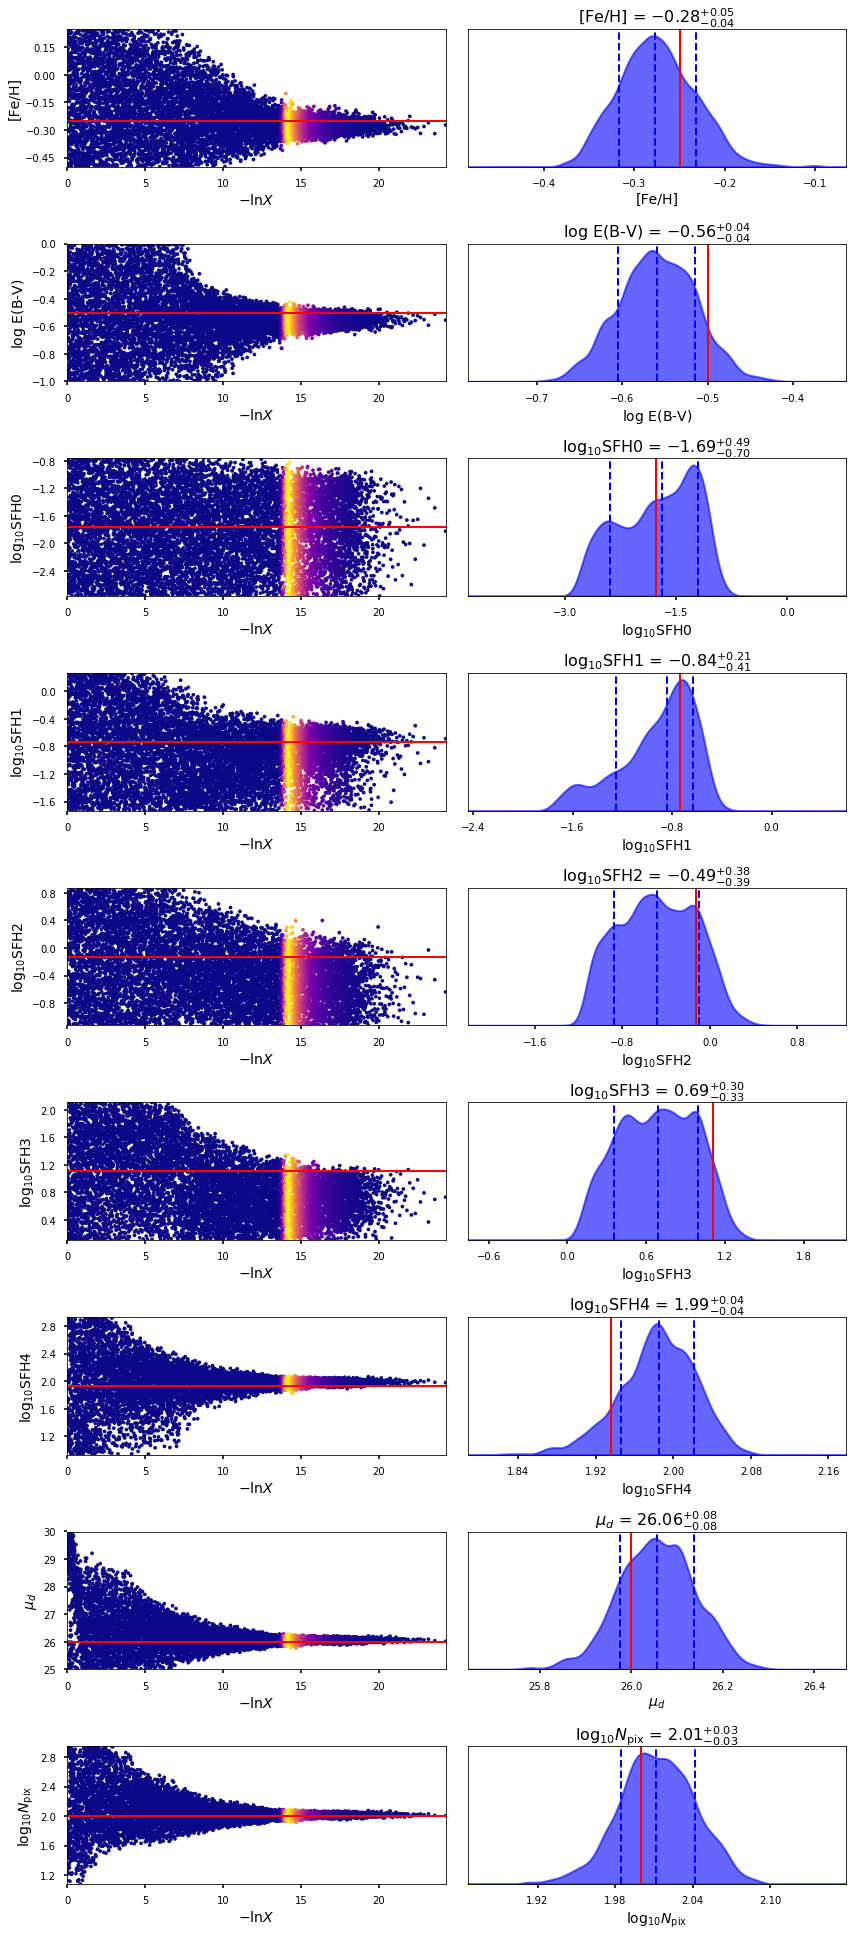

In [9]:
fig, axes = r.plot_trace(max_logl=max_logl);
plt.tight_layout()

In [48]:
dyres = r.as_dynesty(max_logl=max_logl)

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


In [56]:
res['mock_5'].as_dynesty(max_logl=None).logz[-1]

-897.6957530658317

In [54]:
res['mock_5'].as_dynesty(max_logl=max_logls.loc['mock_5'].logl_mean).logz[-1]

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


-1004.7820128569895

In [57]:
res['mock_8'].as_dynesty(max_logl=None).logz[-1]

-904.64

In [55]:
res['mock_8'].as_dynesty(max_logl=max_logls.loc['mock_8'].logl_mean).logz[-1]

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


-993.2180186939484

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


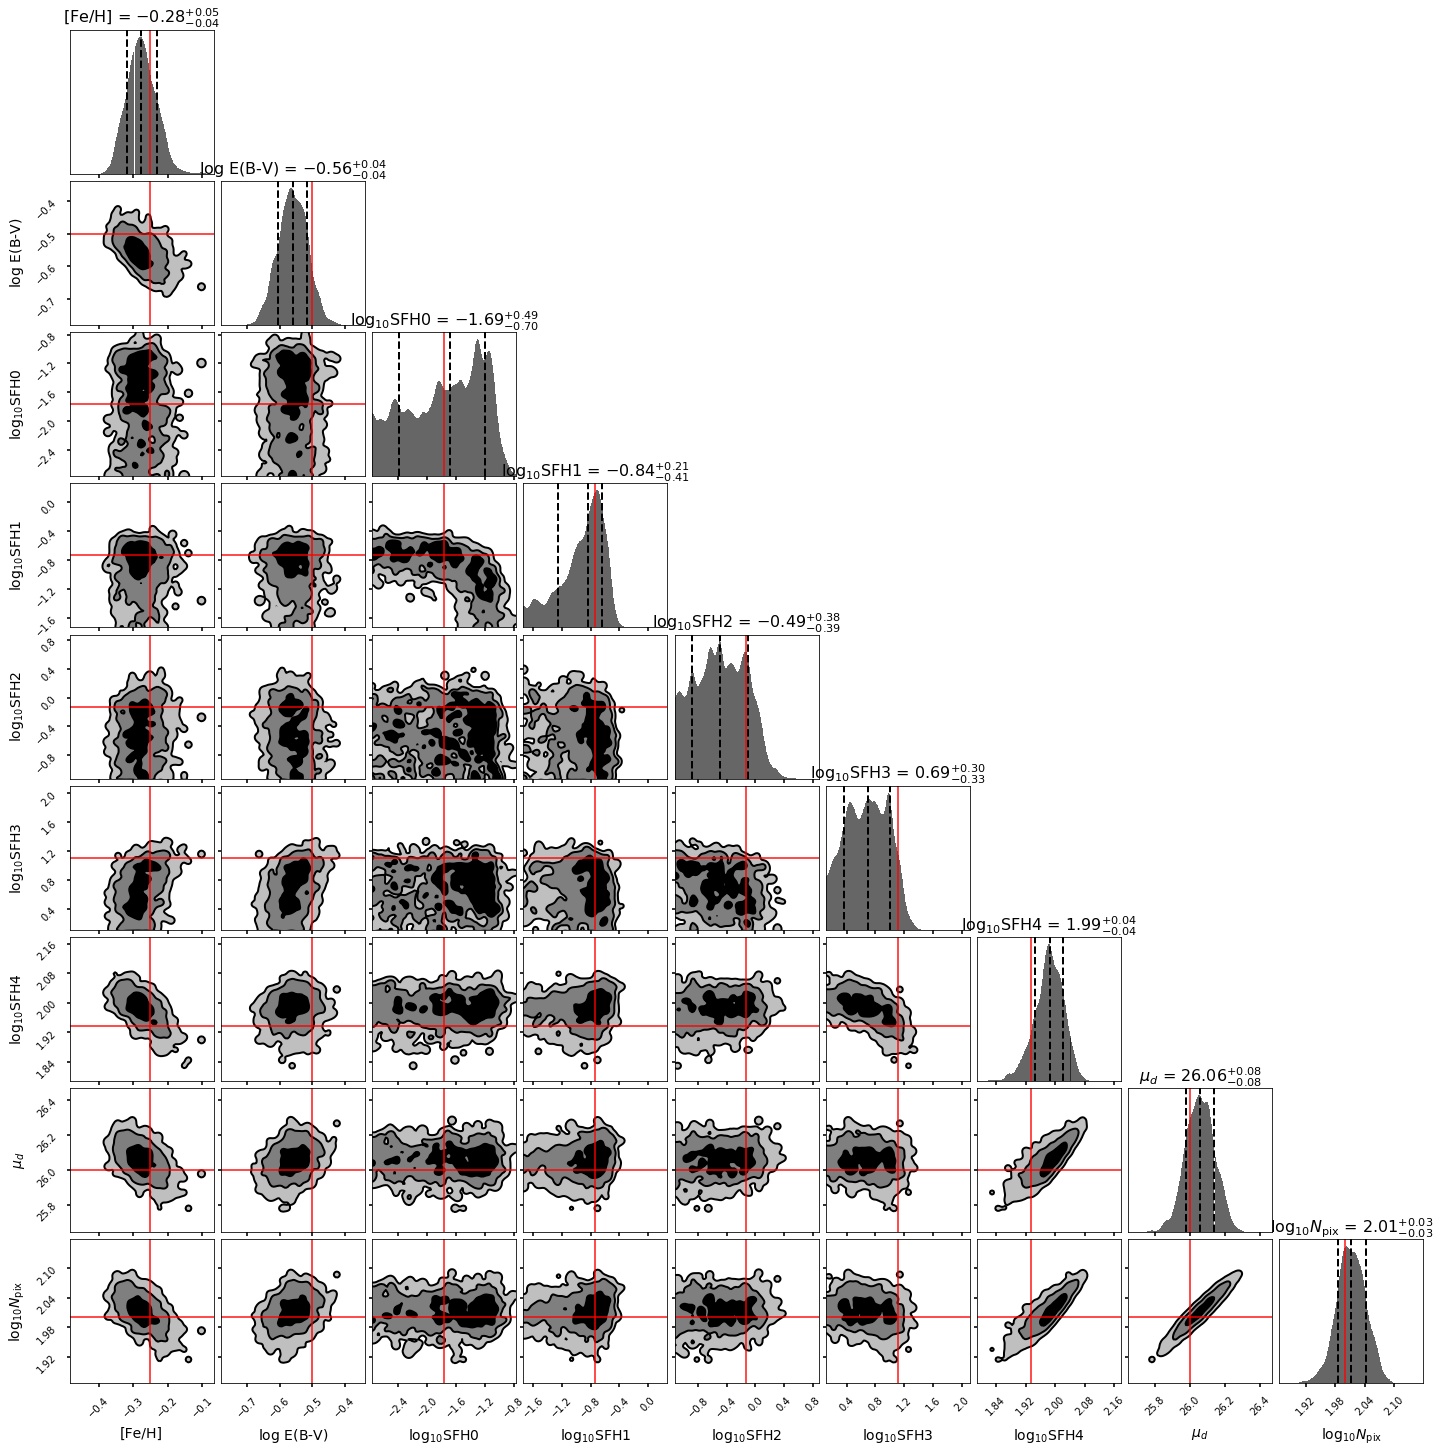

In [10]:
fig, axes = r.plot_corner(max_logl=max_logl);

# Figure 5

In [7]:
r = res['mock_5']

In [11]:
r.get_equal_samples(max_logl=max_logls.loc['mock_5'].logl_mean)

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


array([[-0.23564, -0.52442,  1.9696 ,  3.0688 , 25.92   ],
       [-0.2701 , -0.55367,  2.0446 ,  2.7635 , 26.15   ],
       [-0.28818, -0.47297,  2.0478 ,  3.0524 , 26.152  ],
       ...,
       [-0.23993, -0.53726,  1.9846 ,  2.9409 , 25.962  ],
       [-0.25005, -0.53977,  1.9929 ,  2.9516 , 25.996  ],
       [-0.26142, -0.51247,  2.0197 ,  2.9181 , 26.065  ]])

In [19]:
r.true_params

[-0.25, -0.5, 6.0, 3.0, 26.0]

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


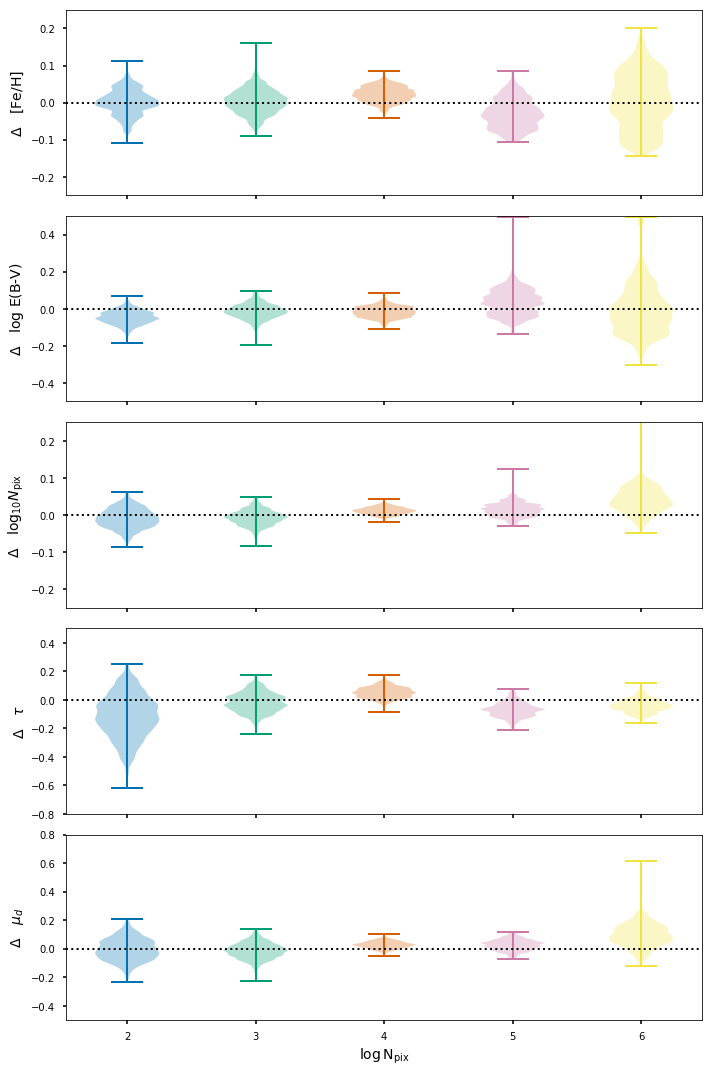

In [24]:
fig, axes = plt.subplots(nrows=5, figsize=(10, 15), sharex=True)
keys = ['mock_5', 'mock_25', 'mock_26', 'mock_27', 'mock_28']
Npixs = np.arange(2, 7)
for i, k in enumerate(keys):
    r = res[k]
    samples = r.get_equal_samples(max_logl=max_logls.loc[k].logl_mean)
    for j in range(5):
        axes[j].violinplot([samples[:, j] - r.true_params[j]], [Npixs[i]])
for j in range(5):
    ax = axes[j]
    ax.axhline(y=0, color='k', ls=':')
    ax.set_ylabel(r'$\Delta\quad$' + res['mock_5'].labels[j])
    
axes[0].set_ylim([-0.25, 0.25])
axes[1].set_ylim([-.5, .5])
axes[2].set_ylim([-.25, .25])
axes[3].set_ylim([-.8, .5])
axes[4].set_ylim([-.5, .8])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$')
plt.tight_layout()

# Figure 6

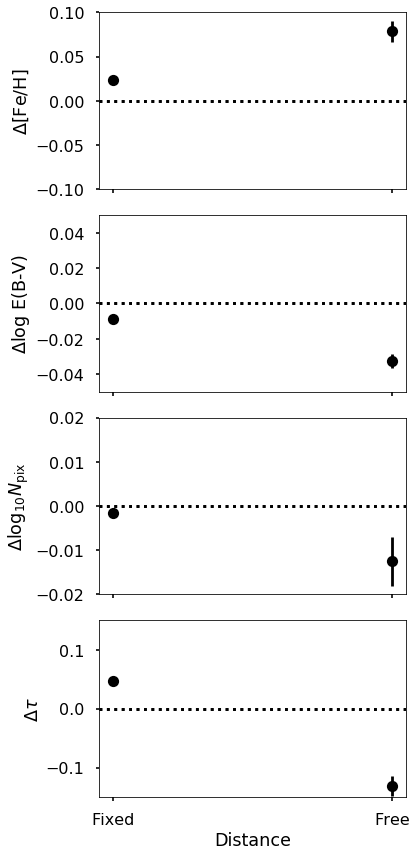

In [146]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 12), sharex=True)
keys = ['mock_1', 'mock_3']
Npixs = [0, 1]
for i in range(4):
    ax = axes[i]
    for N, k in zip(Npixs, keys):
        ax.errorbar(N, res[k].summary_stats.mean[i]-res[k].true_params[i], 2.*res[k].summary_stats.std[i], marker='o', color='k')
        ax.axhline(y=0, color='k', ls=':')
    ax.set_ylabel(r'$\Delta$' + res['mock_1'].labels[i])
    x_ = res['mock_1'].df[res['mock_1'].params].values[:,i]
#     ax.set_ylim([x_.min(), x_.max()])
    
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.05, 0.05])
axes[2].set_ylim([-0.02, 0.02])
axes[3].set_ylim([-0.15, 0.15])
axes[-1].set_xticks([0, 1])
axes[-1].set_xticklabels(['Fixed', 'Free'])
axes[-1].set_xlabel('Distance')
plt.tight_layout()

In [152]:
res['mock_5'].summary_stats.mean

array([-0.24888938, -0.5424546 ,  1.993435  ,  2.91254209, 25.99913878])

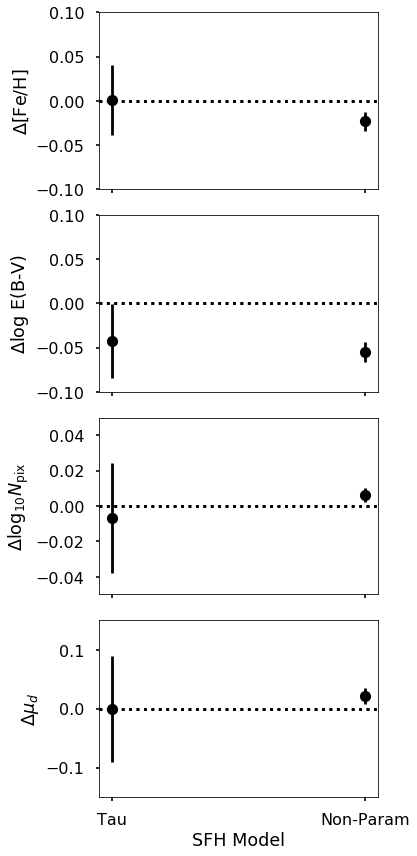

In [153]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 12), sharex=True)
keys = ['mock_5', 'mock_8']
Npixs = [0, 1]
ps = ['logfeh_mean', 'logdust_med', 'logNpix', 'dmod']
for i in range(4):
    ax = axes[i]
    p = ps[i]
    for N, k in zip(Npixs, keys):
        results = res[k]
        idx = results.params.index(p)
        ax.errorbar(N, results.summary_stats.mean[idx]-results.true_params[idx], 2.*results.summary_stats.std[idx], marker='o', color='k')
        ax.axhline(y=0, color='k', ls=':')
        ax.set_ylabel(r'$\Delta$' + results.labels[idx])
#     x_ = res['mock_1'].df[res['mock_1'].params].values[:,i]
#     ax.set_ylim([x_.min(), x_.max()])
    
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
axes[2].set_ylim([-0.05, 0.05])
axes[3].set_ylim([-0.15, 0.15])
axes[-1].set_xticks([0, 1])
axes[-1].set_xticklabels(['Tau', 'Non-Param'])
axes[-1].set_xlabel('SFH Model')
plt.tight_layout()

# Figure 7

In [29]:
colors = sns.color_palette('colorblind', 10).as_hex()

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


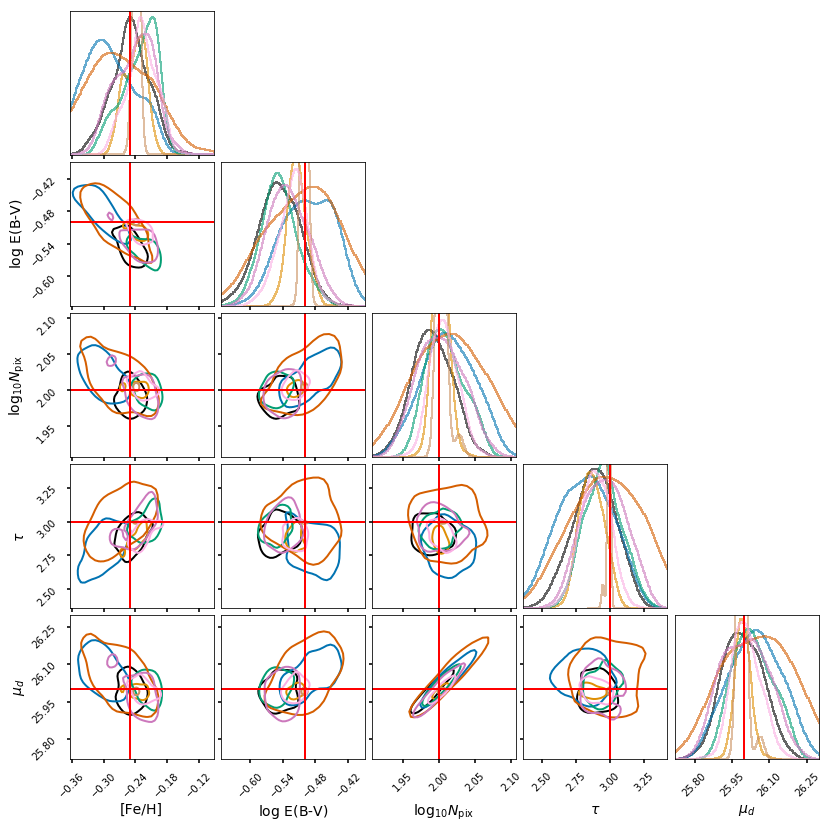

In [34]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(34, 41)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)

/n/home01/bcook/dynesty/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
  new_res.logzerr = np.sqrt(np.array(saved_logzvar))


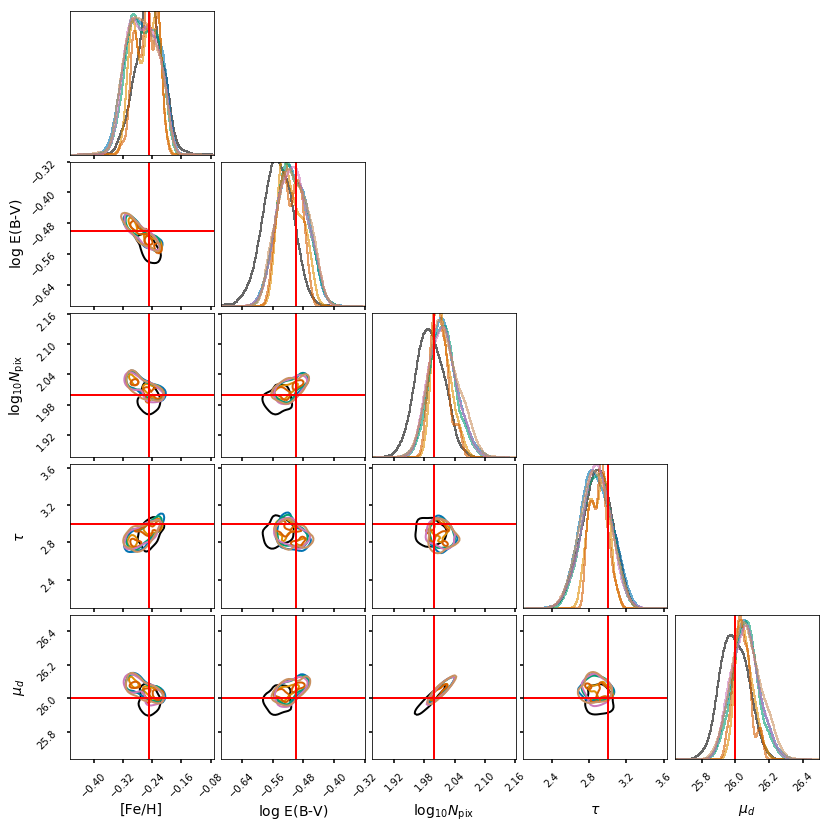

In [35]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(18, 24)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)